In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary librarie
import numpy as np
import matplotlib.pyplot as plt

C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\elisa\Anaconda3\envs\gempy_n\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implemen

In [2]:
geo_model = gp.create_model('Tutorial_ch1-1_Basics')

Advantage of sections: model resolution can be very low

In [3]:
# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model, [0,2000.,0,2000.,0,2000.],[5,5,5], 
      path_o = os.pardir+"/data/input_data/tut_chapter1/simple_fault_model_orientations.csv",
      path_i = os.pardir+"/data/input_data/tut_chapter1/simple_fault_model_points.csv", default_values=True); 

In [4]:
gp.map_series_to_surfaces(geo_model,
                            {"Fault_Series":'Main_Fault', 
                             "Strat_Series": ('Sandstone_2','Siltstone',
                                              'Shale', 'Sandstone_1', 'basement')}, remove_unused_series=True)

,surface,series,order_surfaces,isBasement,color,id
4,Main_Fault,Fault_Series,1,False,#443988,1
0,Shale,Strat_Series,1,False,#015482,2
1,Sandstone_1,Strat_Series,2,False,#9f0052,3
2,Siltstone,Strat_Series,3,False,#ffbe00,4
3,Sandstone_2,Strat_Series,4,False,#728f02,5
5,basement,Strat_Series,5,True,#ff3f20,6


### Add sections

pass section dictionary with startpoint, endpoint and resolution (xy and z)
Current limitations:
- p2 > p1, otherwhise section plot with topography raises error because of scipy.interpolate.RectBivariateSpline, idea: replace with interp2d of same package, problem: looks weird sometimes

In [5]:
section_dict = {'section1':([0,0],[2000,2000],[100,80]),
         'section2':([800,0],[800,2000],[150,100]),
         'section3':([0,200],[1500,500],[200,150])} #p1,p2,resolution

In [6]:
geo_model.grid.set_section_grid(section_dict)

,start,stop,resolution
section1,"[0, 0]","[2000, 2000]","[100, 80]"
section2,"[800, 0]","[800, 2000]","[150, 100]"
section3,"[0, 200]","[1500, 500]","[200, 150]"


In [7]:
geo_model.grid.grid_types

array(['regular', 'custom', 'topography', 'sections', 'gravity'],
      dtype='<U10')

In [8]:
from gempy.plot import vis2d_sections

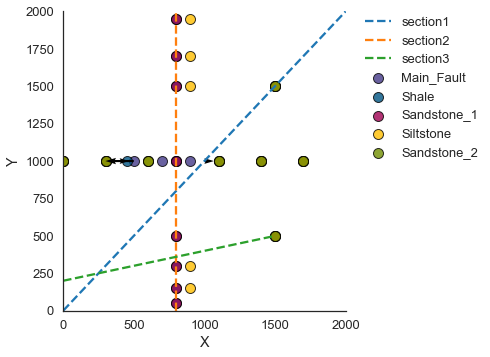

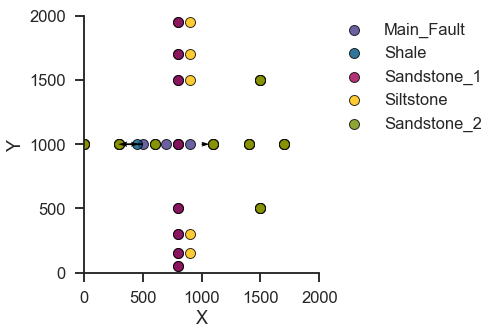

In [9]:
plot= vis2d_sections.PlotSolution(geo_model)
plot.plot_section_traces(show_data=True)
gp.plot.plot_data(geo_model, direction='z')

In [10]:
geo_model.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False


In [11]:
gp.set_interpolation_data(geo_model,
                          compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=['fault matrix'])

Compiling theano function...
Compilation Done!


In [12]:
if False:
    geo_model.grid.set_regular_grid([0,2000.,0,2000.,0,2000.],[50,50,50])
    geo_model.grid.deactivate_all_grids()
    geo_model.grid.set_active('regular')
    geo_model.rescaling.set_rescaled_grid()
    geo_model.update_to_interpolator()

In [13]:
gp.compute_model(geo_model)

self.fault_drift __str__ = []
self.fault_drift __str__ = []
self.fault_drift __str__ = [[10. 10. 10. ... 10. 10. 10.]]
self.fault_drift __str__ = [[10. 10. 10. ... 10. 10. 10.]]


../..\gempy\core\solution.py:258: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))
../..\gempy\core\solution.py:258: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))
../..\gempy\core\solution.py:258: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))
../..\gempy\core\solution.py:258: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due to: ' + str(e))
../..\gempy\core\solution.py:258: UserWarning: Surfaces not computed due to: marching_cubes_lewiner() got an unexpected keyword argument 'mask'
  warnings.warn('Surfaces not computed due t


Lithology ids 
  [6.         5.         4.         2.         2.         6.
 6.         4.         2.00010127 2.         6.         6.
 5.         3.         2.         6.         5.         4.
 2.         2.         6.         5.         4.         2.
 2.         6.         5.         3.         2.         2.
 6.         5.         3.87177381 2.         2.         6.
 6.         4.         2.         2.         6.         5.
 3.         2.         2.         6.         4.02834603 3.
 2.         2.         6.         5.         3.         2.
 2.         6.         5.         4.         2.         2.
 6.         6.         4.         2.         2.         6.
 5.         3.         2.         2.         6.         4.
 3.         2.         2.         6.         5.         3.
 2.         2.         6.         5.         3.9999794  2.
 2.         6.         5.         4.         2.         2.
 6.         5.         3.         2.         2.         6.
 5.         3.         2.         2.  

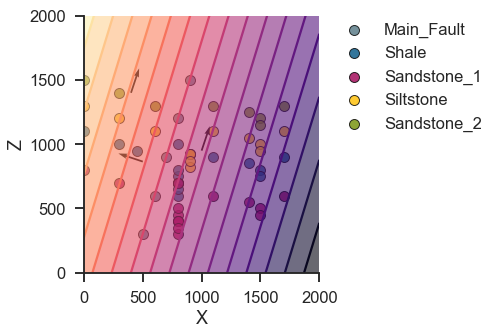

In [51]:
gp.plot.plot_scalar_field(geo_model, 25)

In [80]:
vals = geo_model.grid.sections.values[::10]

(0, 2000)

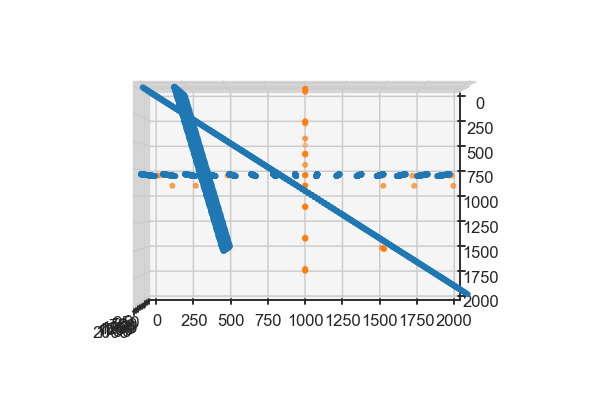

In [85]:
vals

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vals[:, 0],vals[:, 1],vals[:, 2])
ax.scatter(geo_model.surface_points.df['X'],
           geo_model.surface_points.df['Y'],
          geo_model.surface_points.df['Z'])
ax.view_init(90, 0)
ax.set_xlim(0,2000)
ax.set_ylim(0,2000)

In [38]:
geo_model.interpolator.theano_graph.n_universal_eq_T.set_value(np.array([0,0]))
geo_model.interpolator.set_theano_shared_weights()

In [39]:
sol = gp.compute_model_at(vals, geo_model)

self.fault_drift __str__ = []
self.fault_drift __str__ = []
self.fault_drift __str__ = [[10. 10. 10. ... 20. 20. 20.]]
self.fault_drift __str__ = [[10. 10. 10. ... 20. 20. 20.]]


In [35]:
l = geo_model.grid.sections.length
l

array([    0,  8000, 23000, 53000], dtype=int32)

In [34]:
geo_model.grid.sections.resolution[0]

[100, 80]

In [49]:
s = geo_model.solutions.sections_scalfield[0]
s

array([-0.35796319, -0.3680502 , -0.3781372 , ..., -0.76656272,
       -0.77030753, -0.77405233])

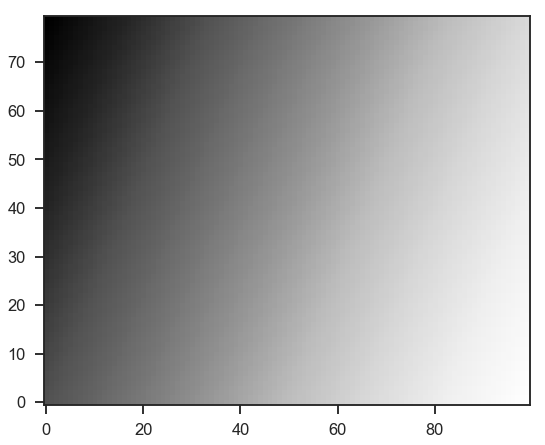

In [50]:
plt.imshow(s[l[0]: l[1]].reshape(
geo_model.grid.sections.resolution[0][::-1]), origin='bottom')
          

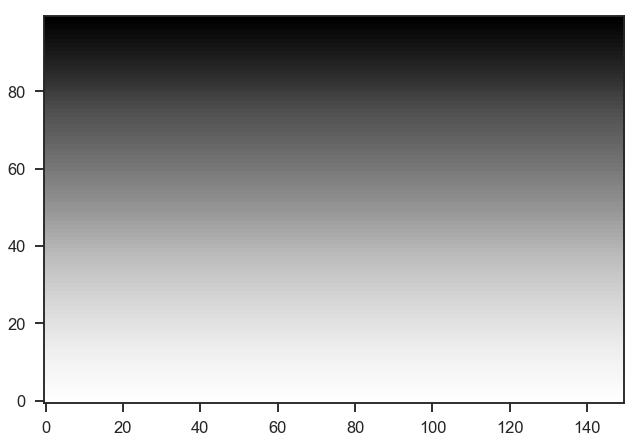

In [51]:
plt.imshow(s[l[1]: l[2]].reshape(
geo_model.grid.sections.resolution[1][::-1]), origin='bottom')

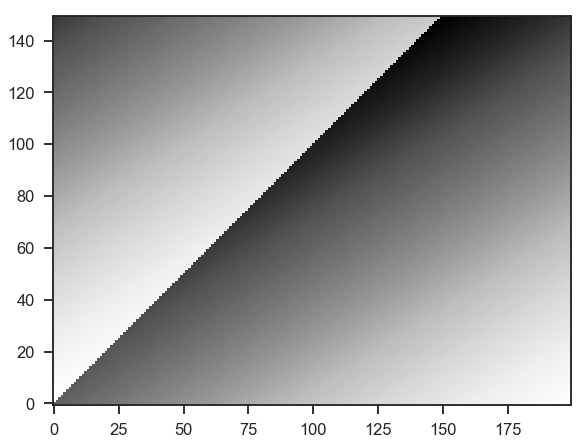

In [52]:
plt.imshow(s[l[2]: l[3]].reshape(
geo_model.grid.sections.resolution[2][::-1]), origin='bottom')

In [66]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
geo_model.grid.regular_grid.values

array([[ 200.,  200.,  200.],
       [ 200.,  200.,  600.],
       [ 200.,  200., 1000.],
       [ 200.,  200., 1400.],
       [ 200.,  200., 1800.],
       [ 200.,  600.,  200.],
       [ 200.,  600.,  600.],
       [ 200.,  600., 1000.],
       [ 200.,  600., 1400.],
       [ 200.,  600., 1800.],
       [ 200., 1000.,  200.],
       [ 200., 1000.,  600.],
       [ 200., 1000., 1000.],
       [ 200., 1000., 1400.],
       [ 200., 1000., 1800.],
       [ 200., 1400.,  200.],
       [ 200., 1400.,  600.],
       [ 200., 1400., 1000.],
       [ 200., 1400., 1400.],
       [ 200., 1400., 1800.],
       [ 200., 1800.,  200.],
       [ 200., 1800.,  600.],
       [ 200., 1800., 1000.],
       [ 200., 1800., 1400.],
       [ 200., 1800., 1800.],
       [ 600.,  200.,  200.],
       [ 600.,  200.,  600.],
       [ 600.,  200., 1000.],
       [ 600.,  200., 1400.],
       [ 600.,  200., 1800.],
       [ 600.,  600.,  200.],
       [ 600.,  600.,  600.],
       [ 600.,  600., 1000.],
       [ 6

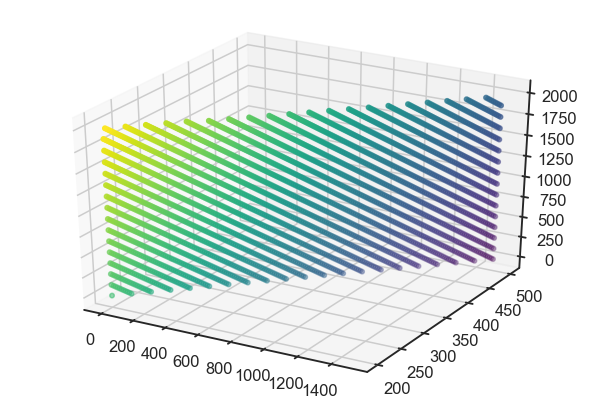

In [73]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(coord[:,0], coord[:, 1], coord[:,2],
           c=s[l[2]: l[3]: 10], cmap='viridis')

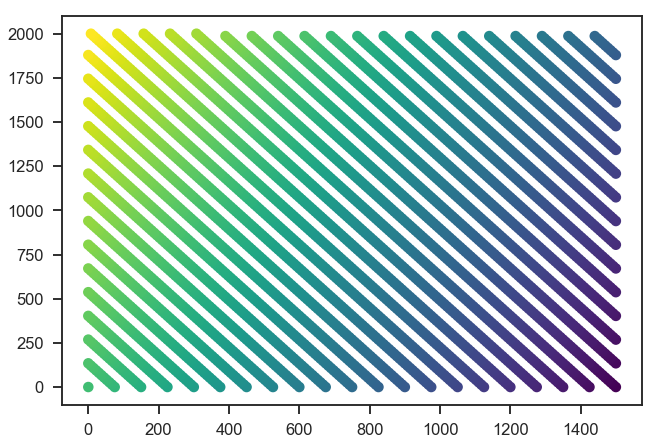

In [71]:


coord = geo_model.grid.sections.values[l[2]:l[3]:10]

plt.scatter(coord[:,0], coord[:,2], c=s[l[2]: l[3]:10], cmap='viridis')

In [60]:
s[l[2]: l[3]]

array([-0.3579632 , -0.361708  , -0.3654528 , ..., -0.20484219,
       -0.20858699, -0.2123318 ])

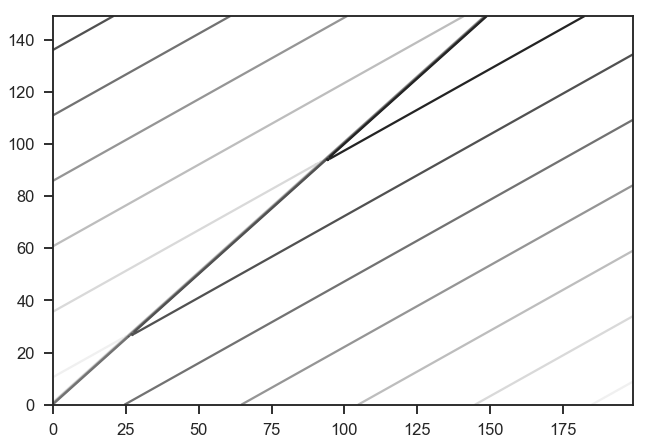

In [52]:
plt.contour(sol[3][0][:l1-l0].reshape(
geo_model.grid.sections.resolution[-1][::-1 ]))

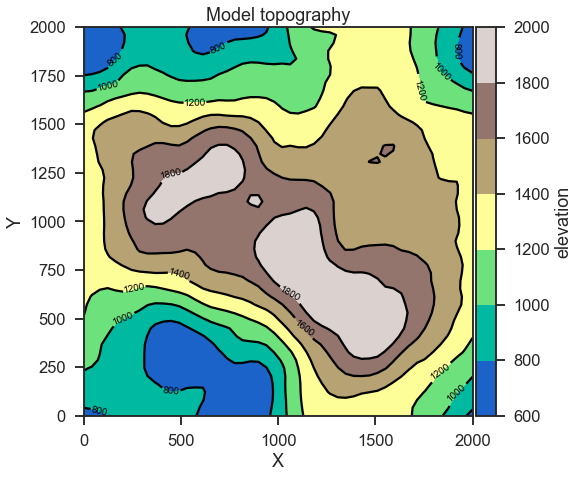

In [13]:
geo_model.set_topography(fd=1.2,d_z=np.array([600,2000]),resolution=np.array([50,50]))

In [13]:
sol = gp.compute_model(geo_model, compute_mesh=False)

self.fault_drift __str__ = []
self.fault_drift __str__ = []
self.fault_drift __str__ = [[10. 10. 10. ... 10. 10. 10.]]
self.fault_drift __str__ = [[10. 10. 10. ... 10. 10. 10.]]


In [25]:
geo_model.grid.sections.resolution

[[100, 80], [150, 100], [200, 150]]

((53355, 3), (53355, 3))

In [55]:
100*80+150*100+200*150, l0, l1

(53000, 23000, 53000)

In [53]:
 geo_model.solutions.sections_scalfield.shape

(2, 53150)

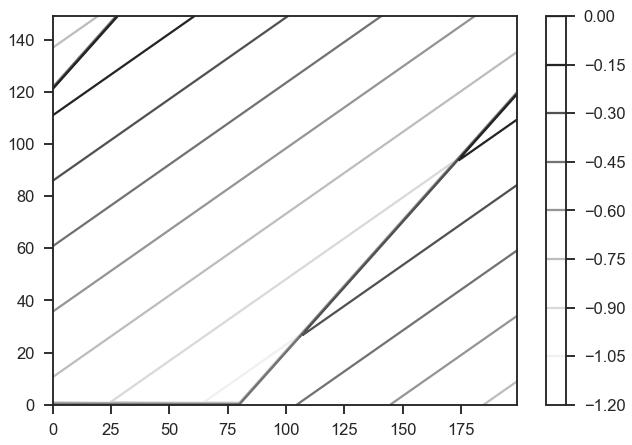

In [70]:
a = geo_model.solutions.sections_scalfield[0][l0:l1].reshape(
geo_model.grid.sections.resolution[-1][::-1 ])

b = geo_model.solutions.sections_scalfield[1][l0:l1].reshape(
geo_model.grid.sections.resolution[-1][::-1 ])

plt.contour(a)
plt.colorbar()
# plt.contour(b)

In [14]:
plot= vis2d_sections.PlotSolution(geo_model)
plot.plot_map(geo_model.solutions)

AssertionError: Geological map not computed. Activate the topography grid.

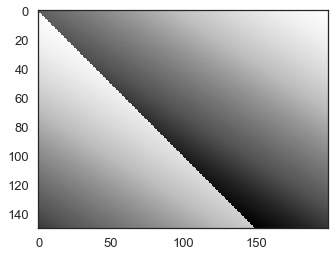

In [14]:
j=2
l0, l1 = geo_model.grid.sections.get_section_args('section3')
shapes = geo_model.grid.sections.resolution
plt.imshow(geo_model.solutions.sections_scalfield[0][l0:l1].reshape(shapes[j][1], shapes[j][0]))

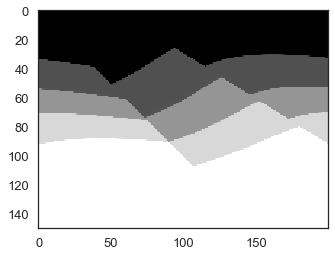

In [19]:
j=2
l0, l1 = geo_model.grid.sections.get_section_args('section3')
shapes = geo_model.grid.sections.resolution
plt.imshow(geo_model.solutions.sections[0][l0:l1].reshape(shapes[j][1], shapes[j][0]))

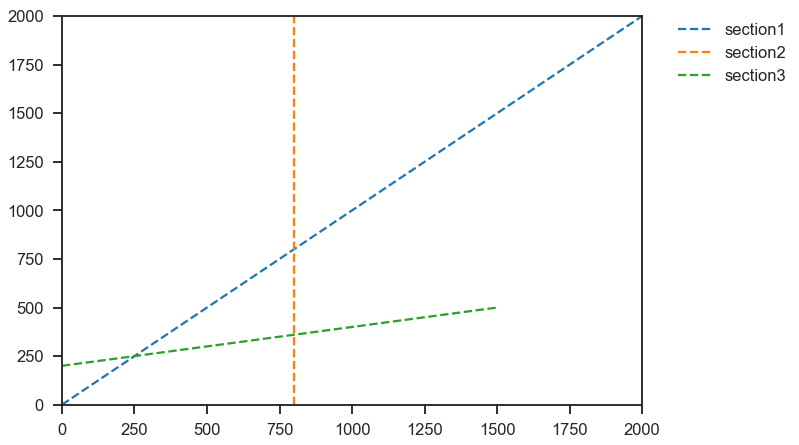

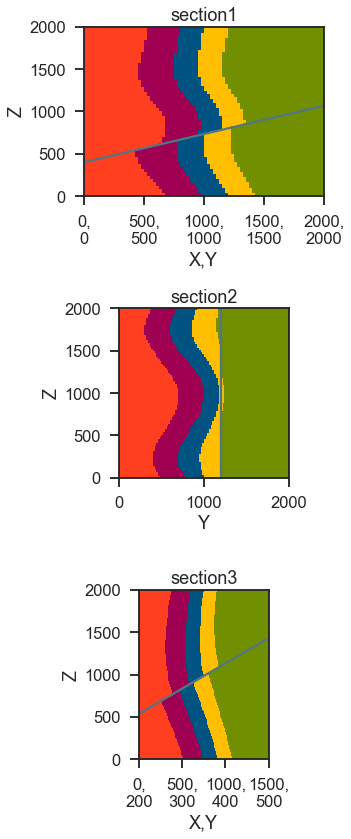

In [15]:
plot.plot_sections(show_traces=True)

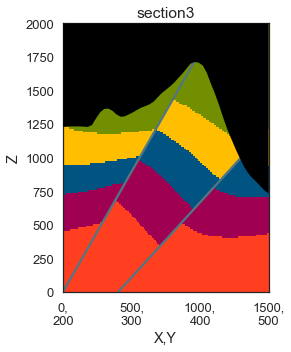

In [16]:
### This is wrong. There is only one fault?!?!
#I think it is due to how I generate the coordinates for diagonal sections
plot.plot_sections(figsize=(5,5), section_names = ['section3'],show_traces=False)

In [17]:
def calculate_line_coordinates_2points(self, p1, p2, resx, resy):
    x0 = p1[0]
    x1 = p2[0]
    y0 = p1[1]
    y1 = p2[1]

    dx = np.abs((x1 - x0) / resx)
    dy = np.abs((y1 - y0) / resy)

    if x0 == x1:  # slope is infinite
        # for cases where phi == -np.pi/2 or phi == np.pi/2
        xi = x0 * np.ones(resy)
        yj = np.linspace(y0, y1, resy)
    else:
        # calculate support points between two points
        phi = np.arctan2(y1 - y0, x1 - x0)  # angle of line with x-axis
        if np.pi / 2 < phi <= np.pi: #shift all values to first or fourth quadrant
            phi -= np.pi
        elif -np.pi <= phi < -np.pi / 2:
            phi += np.pi  # shift values in first or fourth quadrant so that cosine is positive
        else:
            pass
        ds = np.abs(dx * np.cos(phi)) + np.abs(dy * np.sin(phi))  # support point spacing
        # abs needed for cases where phi == -1/4 pi or 3/4 pi
        if x0 > x1:
            n_points = np.ceil((x0 - x1) / (ds * np.cos(phi)))
        else:
            n_points = np.ceil((x1 - x0) / (ds * np.cos(phi)))
        xi = np.linspace(x0, x1, int(n_points))
        m = (y1 - y0) / (x1 - x0)  # slope of line
        yj = m * (xi - x0) + y0 * np.ones(xi.shape)  # calculate yvalues with line equation
    return np.vstack((xi, yj)).T


In [28]:
xy=calculate_line_coordinates_2points(geo_model.grid.sections, 
                                  geo_model.grid.sections.points[2][0],geo_model.grid.sections.points[2][1],
geo_model.grid.sections.resolution[2][0],geo_model.grid.sections.resolution[2][0])

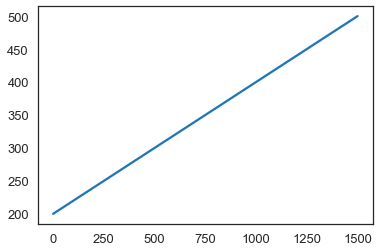

In [29]:
plt.plot(xy[:,0],xy[:,1])

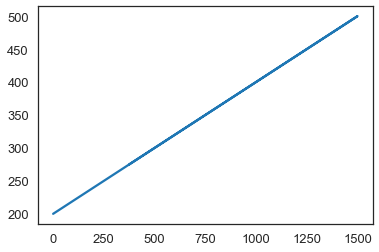

In [40]:
b = geo_model.grid.sections.values[l0:l1]

plt.plot(b[:, 0], b[:, 1])

In [41]:
b

array([[   0. ,  200. ,    0. ],
       [   7.5,  201.5,    0. ],
       [  15. ,  203. ,    0. ],
       ...,
       [ 360. ,  272. , 2000. ],
       [ 367.5,  273.5, 2000. ],
       [ 375. ,  275. , 2000. ]])

In [34]:
zaxis = np.linspace(geo_model.grid.regular_grid.extent[4], geo_model.grid.regular_grid.extent[5], geo_model.grid.sections.resolution[2][1],
                         dtype="float64")
X, Z = np.meshgrid(xy[:, 0], zaxis,indexing='ij')
Y, _ = np.meshgrid(xy[:, 1], zaxis,indexing='ij')
xyz = np.vstack((X.flatten(), Y.flatten(), Z.flatten())).T

In [35]:
X

array([[   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   7.5,    7.5,    7.5, ...,    7.5,    7.5,    7.5],
       [  15. ,   15. ,   15. , ...,   15. ,   15. ,   15. ],
       ...,
       [1485. , 1485. , 1485. , ..., 1485. , 1485. , 1485. ],
       [1492.5, 1492.5, 1492.5, ..., 1492.5, 1492.5, 1492.5],
       [1500. , 1500. , 1500. , ..., 1500. , 1500. , 1500. ]])

In [36]:
Y

array([[200. , 200. , 200. , ..., 200. , 200. , 200. ],
       [201.5, 201.5, 201.5, ..., 201.5, 201.5, 201.5],
       [203. , 203. , 203. , ..., 203. , 203. , 203. ],
       ...,
       [497. , 497. , 497. , ..., 497. , 497. , 497. ],
       [498.5, 498.5, 498.5, ..., 498.5, 498.5, 498.5],
       [500. , 500. , 500. , ..., 500. , 500. , 500. ]])

In [24]:
geo_model.grid.sections.points[2][0],geo_model.grid.sections.points[2][1],
geo_model.grid.sections.resolution[2][0],geo_model.grid.sections.resolution[2][0]

(200, 200)